In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
df=pd.read_csv(r"C:\Users\kulso\OneDrive\Desktop\Internship\Task2\titanic.csv")

 # 1.Generate summary statistics

In [3]:
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


# 2. Histograms and Boxplots

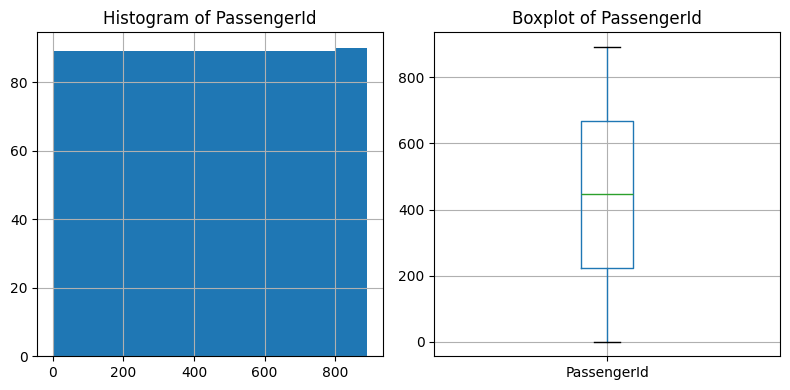

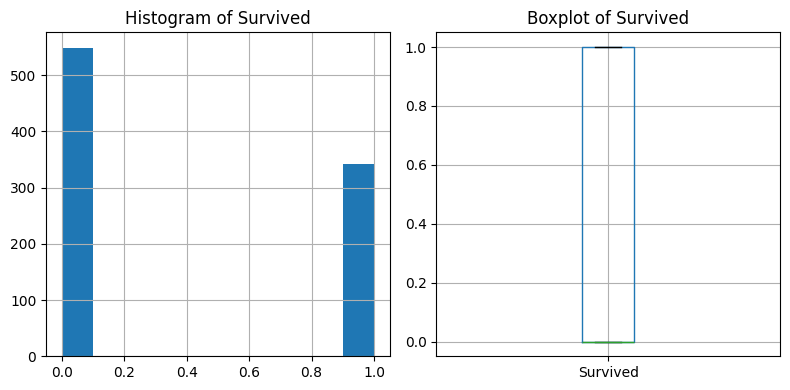

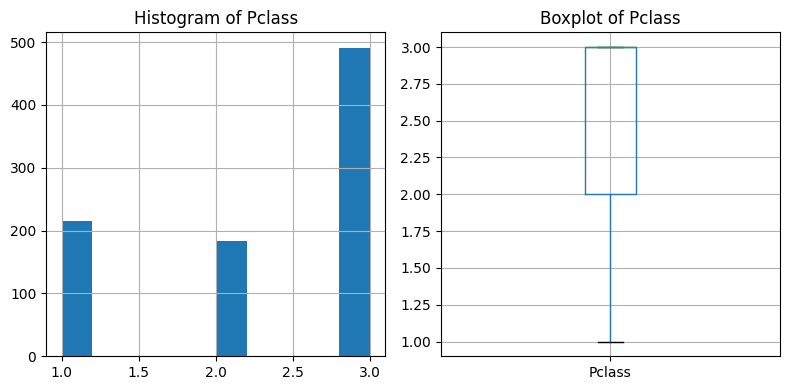

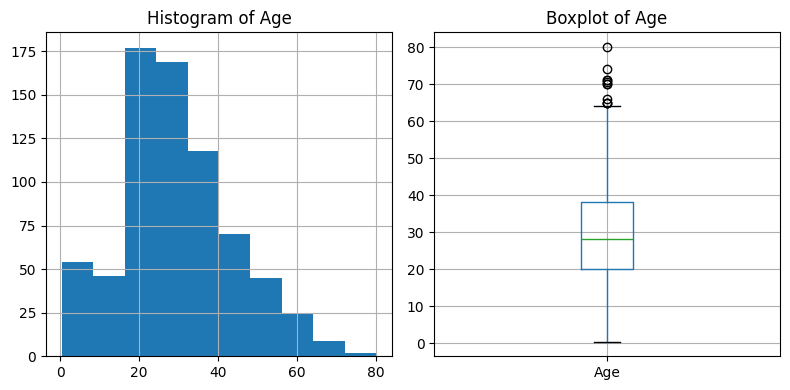

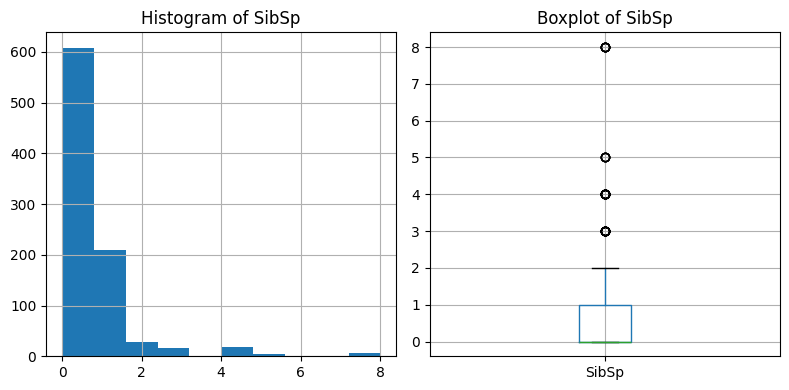

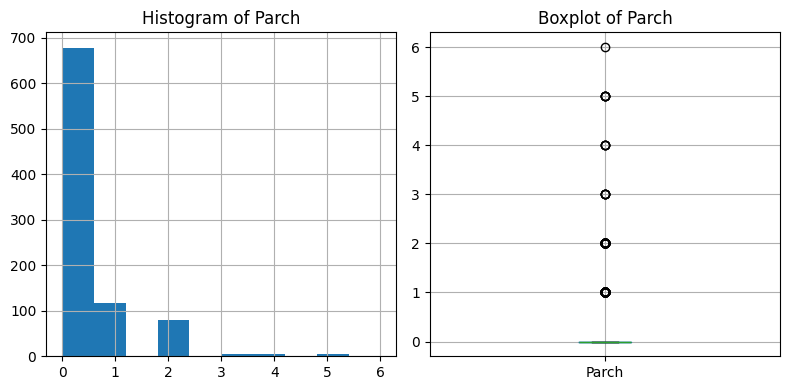

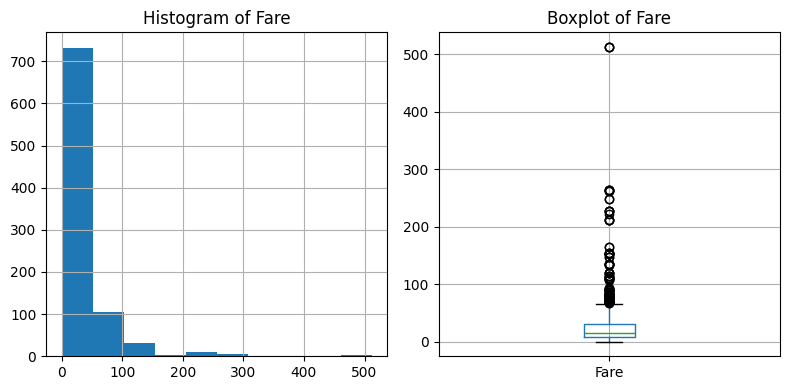

In [4]:
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))  
    plt.subplot(1, 2, 1)
    df[col].hist()
    plt.title(f'Histogram of {col}')
    plt.subplot(1, 2, 2)
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout() 
    plt.show()

# 3. Pairplot/Correlation Matrix

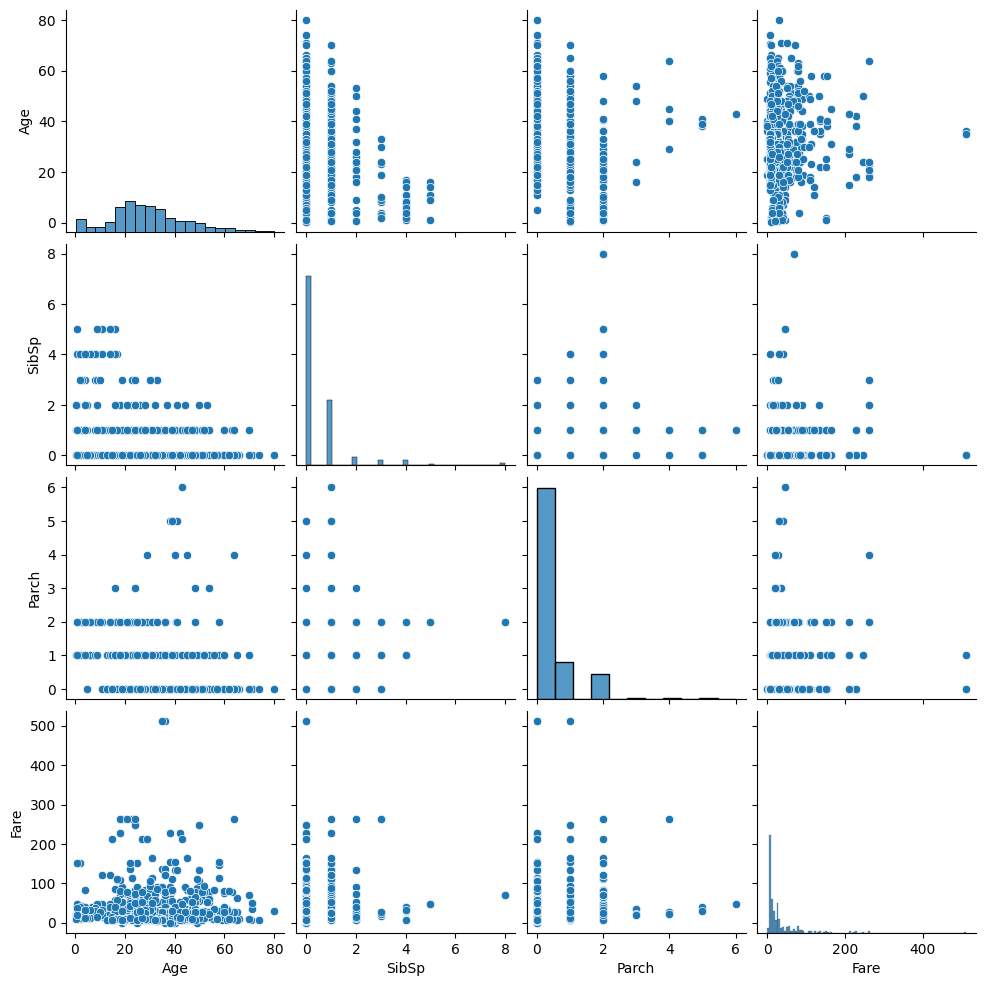

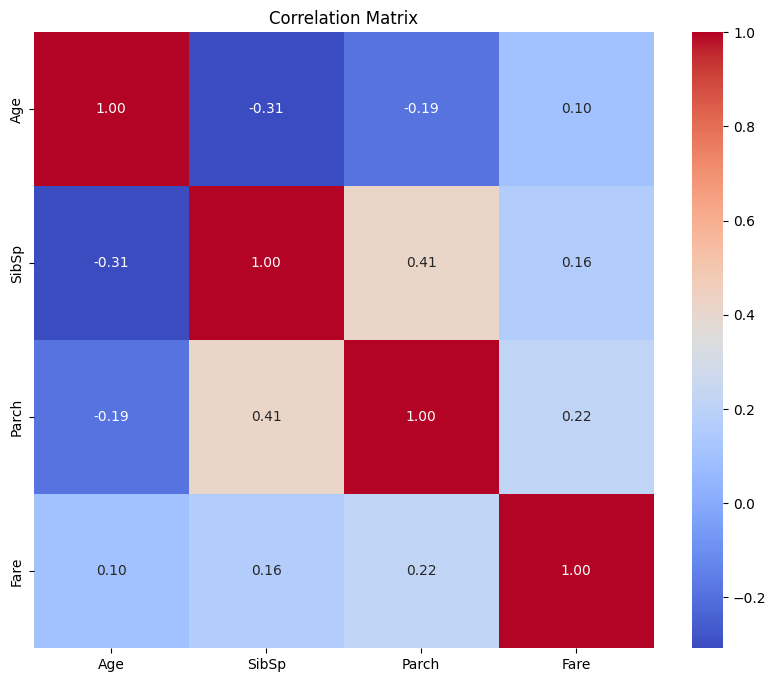

In [ ]:
try:
    subset_for_pairplot = ['Age', 'SibSp', 'Parch', 'Fare']  
    if not all(col in df.columns for col in subset_for_pairplot):
        print("Warning: Some columns specified in 'subset_for_pairplot' are not found in the DataFrame.")
        subset_for_pairplot = list(set(subset_for_pairplot) & set(df.columns))
        if not subset_for_pairplot:
          print("No common columns found. ")
        else:
          print("Using the following columns for pairplot and correlation matrix:", subset_for_pairplot)
    
    if subset_for_pairplot: 
      sns.pairplot(df[subset_for_pairplot])
      plt.show()

      correlation_matrix = df[subset_for_pairplot].corr() 
      plt.figure(figsize=(10, 8))
      sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
      plt.title('Correlation Matrix')
      plt.show()
except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame. Please check your column names.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


# 4.Identify patterns, trends, or anomalies in the data.

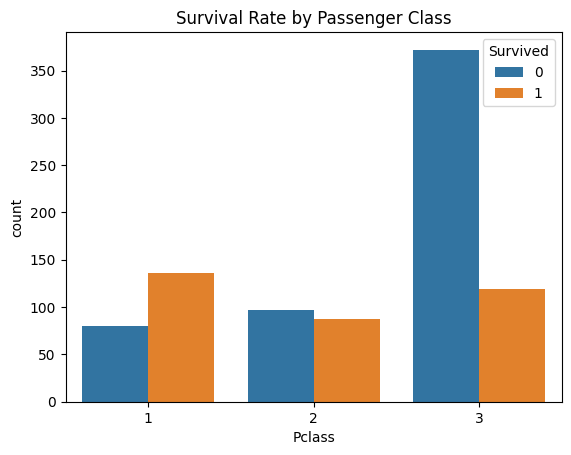

In [12]:
#survival rate by passenger class
plt.figure()
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()


Survival rates by Sex and Class:
 Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


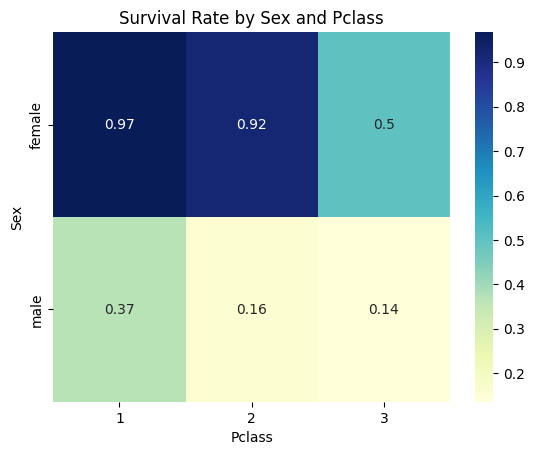

In [13]:
#Trend: Survival by Sex and Class
survival_trend = df.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()
print("\nSurvival rates by Sex and Class:\n", survival_trend)

sns.heatmap(survival_trend, annot=True, cmap='YlGnBu')
plt.title("Survival Rate by Sex and Pclass")
plt.show()

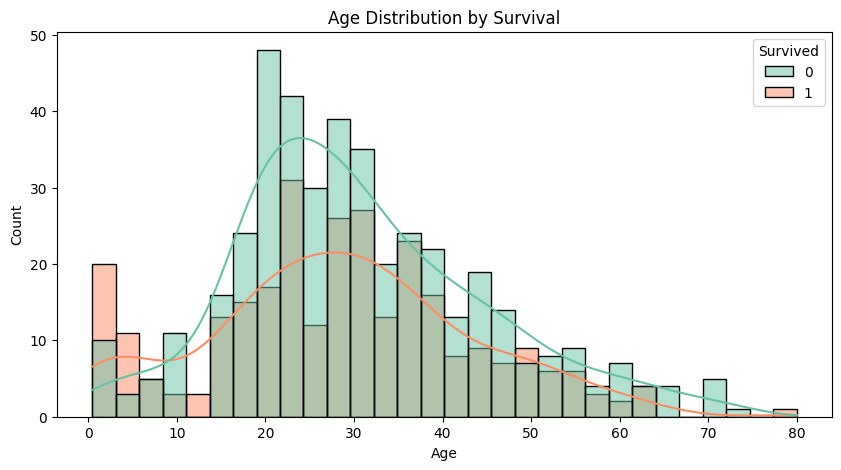

In [14]:
#Pattern: Age vs Survival
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, palette='Set2')
plt.title("Age Distribution by Survival")
plt.show()

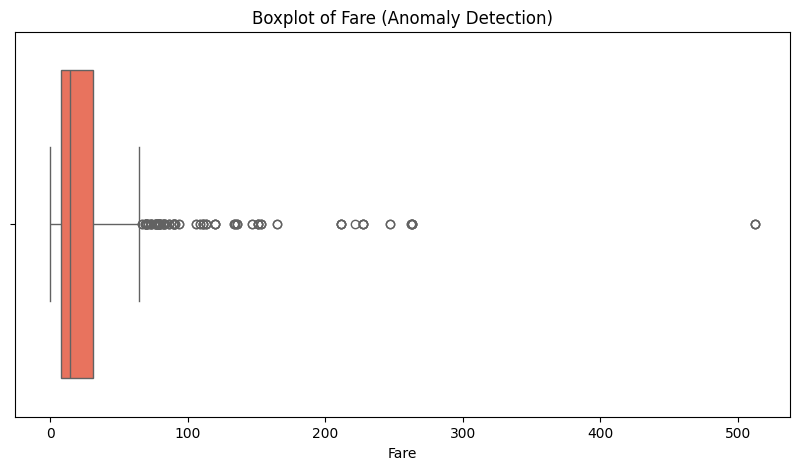

In [15]:
#Anomaly Detection: Fare Outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Fare'], color='tomato')
plt.title("Boxplot of Fare (Anomaly Detection)")
plt.show()

#  5.Make basic feature-level inferences from visuals.

C:\Users\kulso\AppData\Local\Temp\ipykernel_21744\2392384333.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\kulso\AppData\Local\Temp\ipykernel_21744\2392384333.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




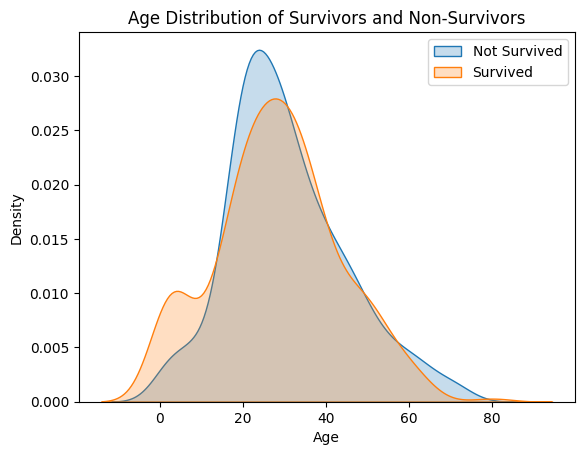

In [ ]:

plt.figure()
sns.kdeplot(df[df['Survived'] == 0]['Age'], label='Not Survived', shade=True)
sns.kdeplot(df[df['Survived'] == 1]['Age'], label='Survived', shade=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution of Survivors and Non-Survivors')
plt.legend()
plt.show()